# Assignment 1

In [23]:
# importing required libraries
import pandas as pd # Pandas
import numpy as np  # NumPy





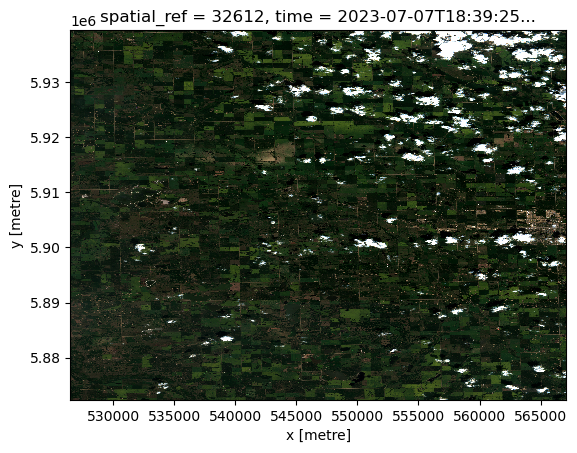

In [14]:
from pystac_client import Client
from odc.stac import load
import matplotlib.pyplot as plt

# Open the STAC API
client = Client.open("https://earth-search.aws.element84.com/v1")

# Define the collection and area of interest
collection = "sentinel-2-l2a"
tas_bbox = [-110, 53, -110.6, 53.6]  # Adjust the bounding box as needed

# Search for images in the specified collection, bounding box, and date range
search = client.search(collections=[collection], bbox=tas_bbox, datetime="2023-07")

# Specify the CRS and resolution
crs = "EPSG:4326"  # WGS84
resolution = 10  # 10 meters resolution, adjust based on your needs

# Load the data
data = load(
    search.items(),
    bbox=tas_bbox,
    #crs=crs,
    #resolution=resolution,
    groupby="solar_day",
    chunks={}
)

# Show the image
data[["red", "green", "blue"]].isel(time=2).to_array().plot.imshow(robust=True)
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


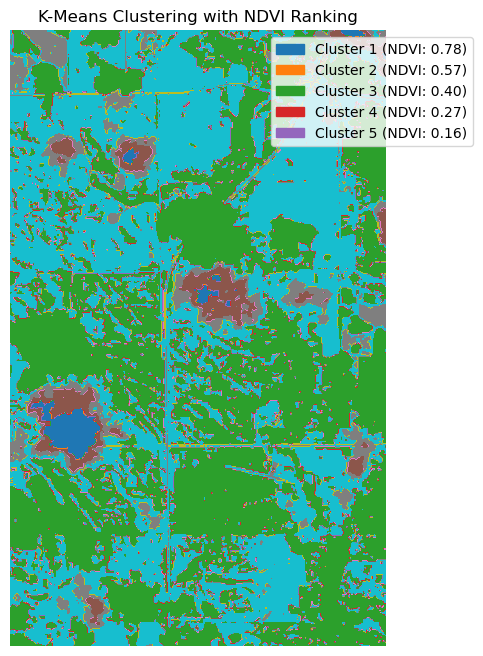

   Cluster  Average_NDVI  Rank
4        4      0.570269     1
0        0      0.157923     2
3        3      0.396557     3
2        2      0.268522     4
1        1      0.777506     5


In [6]:
from pystac_client import Client
from odc.stac import load
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.patches as mpatches
# Open the client and search for Sentinel-2 data
client = Client.open("https://earth-search.aws.element84.com/v1")
collection = "sentinel-2-l2a"
tas_bbox = [-110, 53, -110.05, 53.05]
search = client.search(collections=[collection], bbox=tas_bbox, datetime="2023-07")
# Load the data including the NIR band
data = load(search.items(), bands=["red", "green", "blue", "nir"], bbox=tas_bbox, groupby="solar_day", chunks={})
# Choose the time slice
time_index = 11
# Extract the RGB and NIR bands
red = data["red"].isel(time=time_index).values
green = data["green"].isel(time=time_index).values
blue = data["blue"].isel(time=time_index).values
nir = data["nir"].isel(time=time_index).values
# Calculate NDVI
ndvi = (nir - red) / (nir + red)
# Stack the RGB bands to create the image array
image_array = np.stack([red, green, blue], axis=-1)
# Flatten the image array for clustering
w, h, d = image_array.shape
image_array_flat = np.reshape(image_array, (w * h, d))
# Perform k-means clustering
n_clusters = 5  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(image_array_flat)
# Predict cluster labels for each pixel
labels = kmeans.predict(image_array_flat)
# Reshape the labels to the original image shape
labels = labels.reshape(w, h)
# Calculate average NDVI for each cluster
cluster_ndvi = np.zeros(n_clusters)
for i in range(n_clusters):
    cluster_ndvi[i] = np.mean(ndvi[labels == i])
# Rank clusters based on average NDVI
cluster_ranks = np.argsort(cluster_ndvi)[::-1]
# Plot the clustered image with NDVI ranking
plt.figure(figsize=(12, 8))
plt.imshow(labels, cmap='tab10')
plt.title('K-Means Clustering with NDVI Ranking')
plt.axis('off')
# Create a custom legend
legend_labels = [f'Cluster {i+1} (NDVI: {cluster_ndvi[rank]:.2f})' for i, rank in enumerate(cluster_ranks)]
legend_handles = [mpatches.Patch(color=plt.cm.tab10(i), label=legend_labels[i]) for i in range(n_clusters)]
plt.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()
# Print the ranked clusters
ranked_clusters = pd.DataFrame({
    'Cluster': np.arange(n_clusters),
    'Average_NDVI': cluster_ndvi,
    'Rank': cluster_ranks + 1
}).sort_values('Rank')
print(ranked_clusters)


In [10]:
from pystac_client import Client
from odc.stac import load
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.patches as mpatches
# Open the client and search for Sentinel-2 data
client = Client.open("https://earth-search.aws.element84.com/v1")
collection = "sentinel-2-l2a"
tas_bbox = [-110, 53, -110.05, 53.05]
search = client.search(collections=[collection], bbox=tas_bbox, datetime="2023-07")
# Load the data including the NIR band
data = load(search.items(), bands=["red", "green", "blue", "nir"], bbox=tas_bbox, groupby="solar_day", chunks={})
plt.show()

In [9]:
plt.show()

In [ ]:
# Load the data
data = load(
    search.items(),
    bbox=tas_bbox,
    crs=crs,
    resolution=resolution,
    groupby="solar_day",
    chunks={}
)

In [25]:
# Set url path to data files located in GitHub
url_df_1 = 'https://github.com/imranafsar/Palette_Cohort_6/blob/Afsar-Cohort6/Afsar-Assignments-Cohort6/df_1.csv?raw=true'
url_df_2 = 'https://github.com/imranafsar/Palette_Cohort_6/blob/Afsar-Cohort6/Afsar-Assignments-Cohort6/df_2.csv?raw=true'
url_df_merge = 'C:\\PHPProjects\\url_df_merge.csv'

In [33]:
# Read CSV files
df_1 = pd.read_csv(url_df_1)
df_2 = pd.read_csv(url_df_2)

#Total count of RM's in each csv file
print('Total RMs in df_1.csv: ',df_1.count())
print('Total RMs in df_2.csv: ',df_2.count())

# Print top 20 Items
#print(df_2_CS.head(20))

Total RMs in df_1.csv:  RM    477
dtype: int64
Total RMs in df_2.csv:  RM    464
dtype: int64


In [34]:
#Strip the white spaces and Caitalize the RM names for case sensitive comparison
df_1_CS = df_1['RM'].str.capitalize().str.strip()
df_2_CS = df_2['RM'].str.capitalize().str.strip()

In [35]:
# Concatenate the first column in both CSV data files
df_12_merge = pd.concat( [df_1_CS,df_2_CS],axis=0)#.drop_duplicates().reset_index(drop=True)

#print(df_12_merge.head(20))
print('Total RMs after merging both CSV files: ',df_12_merge.count())
#print(df_12_merge.head(20))

Total RMs after merging both CSV files:  941


In [37]:
# Drop the duplicate values in the merge list of RMs
df_12_merge_rd = df_12_merge.drop_duplicates().reset_index(drop=True)
print('Total Unique RMs after merging both CSV files: ',df_12_merge_rd.count())

Total Unique RMs after merging both CSV files:  502


In [22]:
#merge
print(df_12_merge.head(1))


print(df_12_merge_rd.head(1))

0    Winnipeg
Name: RM, dtype: object
0    Winnipeg
Name: RM, dtype: object


In [ ]:
df_12_merge_rd.to_csv(url_df_merge, sep='\t', encoding='utf-8')
print(df_12_merge_rd.head(20))

# GIS Data Preparation

### ETL(Extract, Transform, Load)

In [25]:
# importing pandas library
import pandas as pd 

#Note that if you have not installed Numpy to your computer you cand do it by following code after # sign

# pip install pandas ---> in you terminal
# !pip install pandas ---> in jupyter cell

In [27]:
import random
import pandas as pd

# Define the range for longitude and latitude
lon_range = (-105, -100)
lat_range = (50, 52)

# Define the list of soil types
soil_types = ['black', 'gray', 'dark brown', 'brown', None]

# Create an empty list to store the farms
farms = []

# Generate 40 farms
for i in range(1000):
    farm = {
        'farm_name': f'Farm {i+1}', # f is formated string
        'farm_lon': round(random.uniform(lon_range[0], lon_range[1]), 2), # random lon with 2 decimal points
        'farm_lat': round(random.uniform(lat_range[0], lat_range[1]), 2), # rantom lat with 2 decimal points
        'temperature': round(random.uniform(18, 25), 1), #random temp with 1 decimal points
        'precipitation': round(random.uniform(20, 50), 1), # random prec with 1 decimal points
        'soil_type': random.choice(soil_types) # random soil types from above list
    }
    farms.append(farm) 

In [31]:
df=pd.DataFrame(farms)

In [32]:
# first and last 5
df

,farm_name,farm_lon,farm_lat,temperature,precipitation,soil_type
0,Farm 1,-103.84,50.15,22.4,29.6,black
1,Farm 2,-104.36,51.72,19.2,27.7,black
2,Farm 3,-104.69,50.79,21.4,38.4,None
3,Farm 4,-101.82,50.29,21.4,42.5,None
4,Farm 5,-103.48,50.12,19.2,21.0,black
...,...,...,...,...,...,...
995,Farm 996,-103.14,50.85,22.2,28.6,brown
996,Farm 997,-101.56,50.83,22.3,34.1,brown
997,Farm 998,-103.04,50.81,23.8,48.3,black
998,Farm 999,-104.47,51.64,22.6,32.8,black


In [33]:
# df.head first 5 rows
df.head()

,farm_name,farm_lon,farm_lat,temperature,precipitation,soil_type
0,Farm 1,-103.84,50.15,22.4,29.6,black
1,Farm 2,-104.36,51.72,19.2,27.7,black
2,Farm 3,-104.69,50.79,21.4,38.4,None
3,Farm 4,-101.82,50.29,21.4,42.5,None
4,Farm 5,-103.48,50.12,19.2,21.0,black


In [34]:
# df.tail last 5 rows
df.tail()

,farm_name,farm_lon,farm_lat,temperature,precipitation,soil_type
995,Farm 996,-103.14,50.85,22.2,28.6,brown
996,Farm 997,-101.56,50.83,22.3,34.1,brown
997,Farm 998,-103.04,50.81,23.8,48.3,black
998,Farm 999,-104.47,51.64,22.6,32.8,black
999,Farm 1000,-101.19,50.89,20.3,46.1,brown


In [35]:
# First 12 raws
df.head(12)

,farm_name,farm_lon,farm_lat,temperature,precipitation,soil_type
0,Farm 1,-103.84,50.15,22.4,29.6,black
1,Farm 2,-104.36,51.72,19.2,27.7,black
2,Farm 3,-104.69,50.79,21.4,38.4,None
3,Farm 4,-101.82,50.29,21.4,42.5,None
4,Farm 5,-103.48,50.12,19.2,21.0,black
5,Farm 6,-104.23,51.20,19.3,46.0,brown
6,Farm 7,-103.60,50.26,20.4,20.3,brown
7,Farm 8,-101.36,51.89,21.2,22.9,None
8,Farm 9,-103.84,51.81,21.4,38.9,None
9,Farm 10,-104.31,50.80,20.2,38.2,gray


In [36]:
# Information about df and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   farm_name      1000 non-null   object 
 1   farm_lon       1000 non-null   float64
 2   farm_lat       1000 non-null   float64
 3   temperature    1000 non-null   float64
 4   precipitation  1000 non-null   float64
 5   soil_type      785 non-null    object 
dtypes: float64(4), object(2)
memory usage: 47.0+ KB


In [38]:
# choosing a column
df[['farm_name']]

,farm_name
0,Farm 1
1,Farm 2
2,Farm 3
3,Farm 4
4,Farm 5
...,...
995,Farm 996
996,Farm 997
997,Farm 998
998,Farm 999


In [39]:
# choosing 2 and more columns
df[['farm_name', 'soil_type']]

,farm_name,soil_type
0,Farm 1,black
1,Farm 2,black
2,Farm 3,None
3,Farm 4,None
4,Farm 5,black
...,...,...
995,Farm 996,brown
996,Farm 997,brown
997,Farm 998,black
998,Farm 999,black


In [40]:
# Changin columns data types
df['farm_name'] = df['farm_name'].astype('string')
df['soil_type'] = df['soil_type'].astype('string')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   farm_name      1000 non-null   string 
 1   farm_lon       1000 non-null   float64
 2   farm_lat       1000 non-null   float64
 3   temperature    1000 non-null   float64
 4   precipitation  1000 non-null   float64
 5   soil_type      785 non-null    string 
dtypes: float64(4), string(2)
memory usage: 47.0 KB


### EDA(Exploratory Data Analysis)

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
farm_lon,1000.0,-102.50410,1.439019,-105.0,-103.7100,-102.575,-101.32,-100.01
farm_lat,1000.0,51.00504,0.575536,50.0,50.4975,50.990,51.51,51.99
temperature,1000.0,21.32490,1.994685,18.0,19.6000,21.300,23.00,25.00
precipitation,1000.0,34.91350,8.629140,20.0,27.3750,35.200,42.10,50.00


In [43]:
# Choosing spesific columns
df[['temperature', 'precipitation']].describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,1000.0,21.3249,1.994685,18.0,19.600,21.3,23.0,25.0
precipitation,1000.0,34.9135,8.629140,20.0,27.375,35.2,42.1,50.0


In [44]:
# Dropping Columns
# df.drop(['farm_lon', 'farm_lat'], axis=1)
df.drop(columns=['farm_lon', 'farm_lat']).describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,1000.0,21.3249,1.994685,18.0,19.600,21.3,23.0,25.0
precipitation,1000.0,34.9135,8.629140,20.0,27.375,35.2,42.1,50.0


## Matplotlib - Data Visualization

In [47]:
# Importing Matplotlib
import matplotlib.pyplot as plt

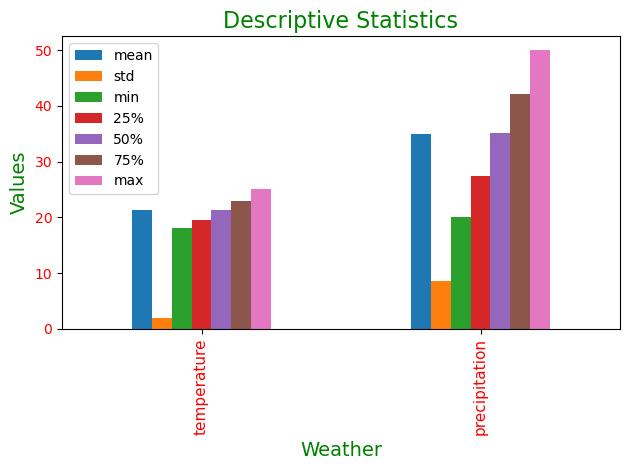

In [48]:

# Plotting 
df.drop(columns=['farm_lon', 'farm_lat']).describe().T\
    .drop(columns='count')\
    .plot(kind='bar')
plt.title('Descriptive Statistics', color='green', fontsize=16)
plt.xlabel('Weather', color='green',fontsize=14)
plt.ylabel('Values', color='green', fontsize=14)
plt.xticks(color='red', fontsize=11)
plt.yticks(color='red')
plt.tight_layout()
plt.show()

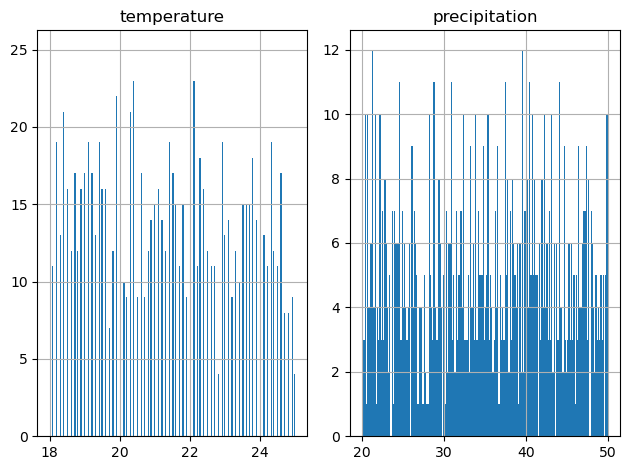

In [50]:
df.drop(columns=['farm_lon', 'farm_lat']).hist(bins=200)
plt.tight_layout()
plt.show()

<Axes: >

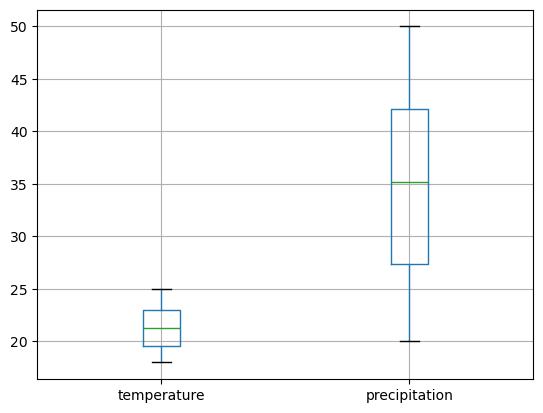

In [51]:
# Outlier analysis
df.drop(columns=['farm_lon', 'farm_lat']).boxplot()

In [ ]:
# Drop
# Replace with neighboring farms value
# Replace with mean, median

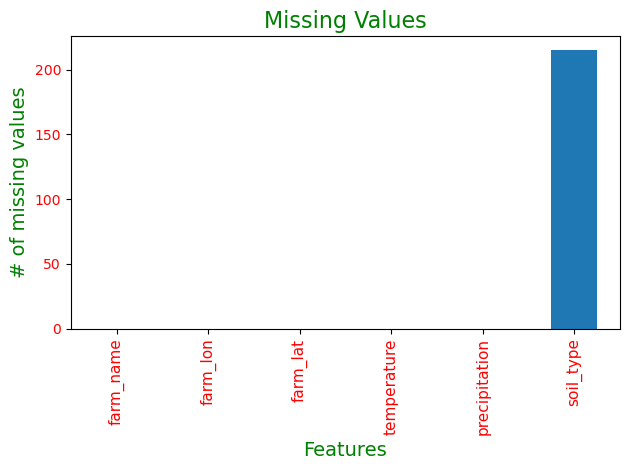

In [52]:
df.isna().sum().plot(kind='bar')
plt.title('Missing Values', color='green', fontsize=16)
plt.xlabel('Features', color='green',fontsize=14)
plt.ylabel('# of missing values', color='green', fontsize=14)
plt.xticks(color='red', fontsize=11)
plt.yticks(color='red')
plt.tight_layout()
plt.show()